# 1.1 Bild einladen
# 1.3 Datentyp auslesen


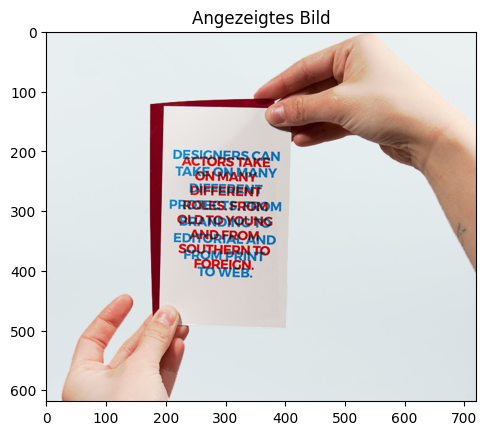

In [1]:
from skimage import io
import matplotlib.pyplot as plt

try:
    image_to_display = io.imread("assets/hidden.png")
    plt.imshow(image_to_display)
    plt.title("Angezeigtes Bild")
    plt.show()
except FileNotFoundError:
    print("Fehler: Die Datei 'assets/hidden.png' wurde nicht gefunden.")
except Exception as e:
    print(f"Ein unbekannter Fehler ist aufgetreten: {e}")

# Aufbau eines Numpy Array

In einem NumPy-Array, das ein Farbbild darstellt, gibt es  drei Dimensionen:

- Erste Dimension (Zeilen): Entspricht der Höhe des Bildes (Anzahl der Pixel in vertikaler Richtung).

- Zweite Dimension (Spalten): Entspricht der Breite des Bildes (Anzahl der Pixel in horizontaler Richtung).

- Dritte Dimension (Farbkanäle): Enthält die Farbwerte (z. B. Rot, Gruen, Blau).


# Farbkanäle

Der Ausdruck [:, :, 0] funktioniert so:

Das erste : bedeutet "alle Zeilen".

Das zweite : bedeutet "alle Spalten".

Die 0 gibt an, dass aus der dritten Dimension (den Farbkanälen) nur der Kanal mit Index 0 ausgewählt wird – der Rotkanal.

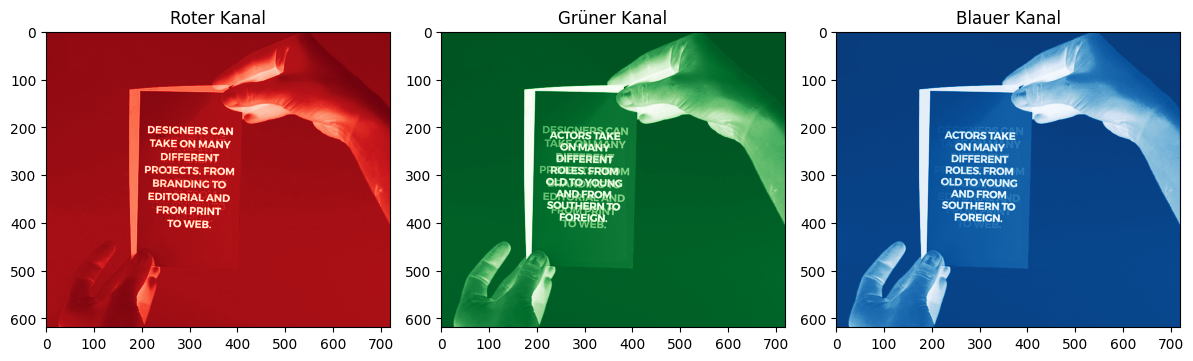

In [2]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

try:
    color_image = io.imread("assets/hidden.png")

    if color_image.ndim == 3:
        red_channel = color_image[:, :, 0]
        green_channel = color_image[:, :, 1]
        blue_channel = color_image[:, :, 2]

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(red_channel, cmap='Reds')
        plt.title("Roter Kanal")

        plt.subplot(1, 3, 2)
        plt.imshow(green_channel, cmap='Greens')
        plt.title("Grüner Kanal")

        plt.subplot(1, 3, 3)
        plt.imshow(blue_channel, cmap='Blues')
        plt.title("Blauer Kanal")

        plt.tight_layout()
        plt.show()
    else:
        print("Das Bild ist kein Farbbild (hat nicht 3 Dimensionen).")

except FileNotFoundError:
    print("Fehler: Die Datei 'assets/hidden.png' wurde nicht gefunden.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")

# Spiegelung eines Bildes


Zunächst werden die Dimensionen des Bildes (Hoehe, Breite und, falls vorhanden, die Anzahl der Kanale) bestimmt. Anschliessend wird ein leeres Datenarray in Form einer verschachtelten Liste erzeugt, das die gleiche Groesse wie das Originalbild hat.

Je nach gewaehlter Spiegelrichtung werden dann in verschachtelten for-Schleifen die einzelnen Pixel an ihre neue Position kopiert:
- Horizontale Spiegelung: Der Pixel an Position (y, x) wird an Position (y, breite - 1 - x) gesetzt.
- Vertikale Spiegelung: Der Pixel an Position (y, x) wird an Position (hoehe - 1 - y) gesetzt.

Nach der Bearbeitung wird das Ergebnis in ein NumPy-Array umgewandelt, wobei der Datentyp dem des Originalbildes entspricht


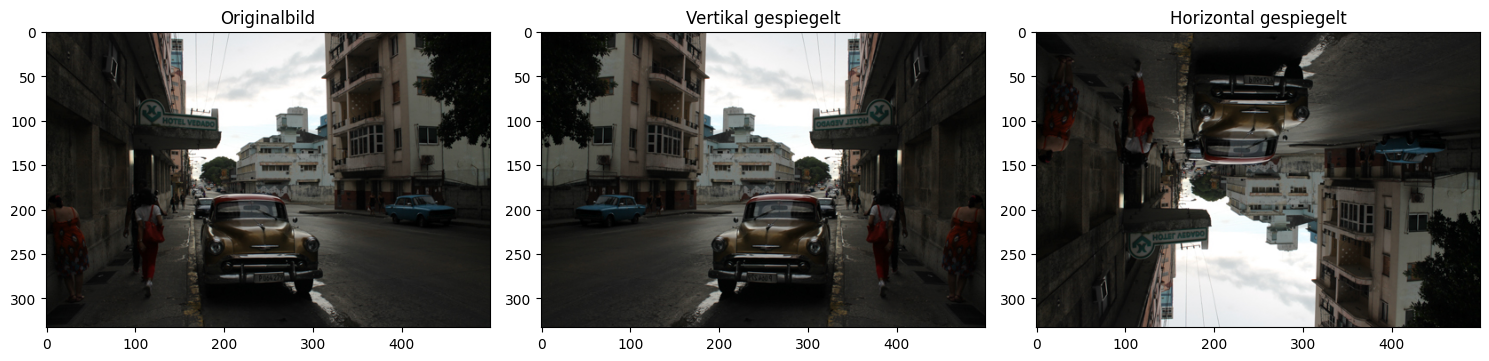

In [3]:
from skimage import io
import matplotlib.pyplot as plt

def spiegeln_bild(bild, richtung="horizontal"):
    """
    Spiegelt ein Bild horizontal oder vertikal (ohne NumPy-Funktionen).

    Args:
        bild (numpy.ndarray): Das einzulesende Bild als NumPy Array.
        richtung (str): "horizontal" oder "vertikal" für die Spiegelrichtung.

    Returns:
        numpy.ndarray: Das gespiegelte Bild als neues NumPy Array.
    """
    hoehe = len(bild)
    breite = len(bild[0])
    kanale = 1
    if bild.ndim == 3:
        kanale = len(bild[0][0])
        gespiegeltes_bild = [[[0 for _ in range(kanale)] for _ in range(breite)] for _ in range(hoehe)]
    else:
        gespiegeltes_bild = [[0 for _ in range(breite)] for _ in range(hoehe)]

    if richtung == "horizontal":
        for y in range(hoehe):
            for x in range(breite):
                if bild.ndim == 3:
                    for c in range(kanale):
                        gespiegeltes_bild[y][breite - 1 - x][c] = bild[y][x][c]
                else:
                    gespiegeltes_bild[y][breite - 1 - x] = bild[y][x]
    elif richtung == "vertikal":
        for y in range(hoehe):
            for x in range(breite):
                if bild.ndim == 3:
                    for c in range(kanale):
                        gespiegeltes_bild[hoehe - 1 - y][x][c] = bild[y][x][c]
                else:
                    gespiegeltes_bild[hoehe - 1 - y][x] = bild[y][x]
    else:
        print("Ungültige Spiegelrichtung. Bitte 'horizontal' oder 'vertikal' angeben.")
        return bild  # Unverändertes Bild zurückgeben

    return np.array(gespiegeltes_bild, dtype=bild.dtype)

# Beispielhafte Anwendung:
try:
    original_image = io.imread("assets/bild01.jpg")

    horizontal_spiegelung = spiegeln_bild(original_image, richtung="horizontal")
    vertikale_spiegelung = spiegeln_bild(original_image, richtung="vertikal")

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(original_image)
    plt.title("Originalbild")

    plt.subplot(1, 3, 2)
    plt.imshow(horizontal_spiegelung)
    plt.title("Vertikal gespiegelt")

    plt.subplot(1, 3, 3)
    plt.imshow(vertikale_spiegelung)
    plt.title("Horizontal gespiegelt")

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Fehler: Die Datei 'assets/bild01.jpg' wurde nicht gefunden.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")